In [55]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [64]:
current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
longformdata = pd.read_csv('longformdata.csv')
display(shortformdata)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,1,2.0,1.380000,7.0,7.0,-1.0,NaN,1.240000,NaN,NaN,NaN,NaN,7.50,0.520000,NaN,0.023077,0.025000
1,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,NaN,NaN,NaN,NaN,7.50,0.520000,NaN,0.023462,0.020417
2,5a09ebdf087f2e0001eae39f,1,2.5,1.580000,2.0,2.0,-1.0,NaN,1.980000,NaN,NaN,NaN,NaN,2.50,0.580000,NaN,0.029310,0.031905
3,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,NaN,NaN,NaN,NaN,2.50,0.600000,NaN,0.029667,0.031000
4,5c5c451500b69200011bb8bf,1,1.5,1.340000,5.0,5.0,1.5,NaN,1.220000,NaN,NaN,NaN,NaN,4.25,0.660000,NaN,0.030000,0.036471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,NaN,NaN,NaN,NaN,5.50,0.530612,NaN,0.030769,0.024348
194,671469967e2a4f2e612e3846,1,2.0,1.520000,5.0,5.0,-2.5,NaN,1.240000,NaN,NaN,NaN,NaN,6.25,0.380000,NaN,0.022632,0.021935
195,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,NaN,NaN,NaN,NaN,6.25,0.540000,NaN,0.021481,0.023636
196,6722ca2b1f3ebd2d544608c3,1,1.5,1.480000,4.0,4.0,-2.5,NaN,1.040000,NaN,NaN,NaN,NaN,5.25,0.500000,NaN,0.023200,0.022800


In [66]:
#create sepeate variables with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

print(len(rej))
print(len(acc))

99
99


In [67]:
display(rej)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,NaN,NaN,NaN,7.50,0.52,NaN,0.023077,0.025000
1,5a09ebdf087f2e0001eae39f,1,2.5,1.58,2.0,2.0,-1.0,NaN,1.98,NaN,NaN,NaN,NaN,2.50,0.58,NaN,0.029310,0.031905
2,5c5c451500b69200011bb8bf,1,1.5,1.34,5.0,5.0,1.5,NaN,1.22,NaN,NaN,NaN,NaN,4.25,0.66,NaN,0.030000,0.036471
3,5c9d004ee3b6c40015254526,1,2.5,1.46,3.5,3.5,0.5,NaN,2.12,NaN,NaN,NaN,NaN,3.25,0.50,NaN,0.022000,0.023200
4,5cc3f0f9fdb33500018c5eeb,1,2.0,1.50,7.0,7.0,-1.5,NaN,0.72,NaN,NaN,NaN,NaN,7.75,0.54,NaN,0.022593,0.021739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,1,2.0,1.46,9.0,9.0,2.5,NaN,1.08,NaN,NaN,NaN,NaN,7.75,0.64,NaN,0.038750,0.036667
95,670d326c55fa3d6f10ebe253,1,2.0,1.42,6.0,6.0,-1.0,NaN,1.70,NaN,NaN,NaN,NaN,6.50,0.56,NaN,0.030357,0.025000
96,6711f493bfc7c4e11953872d,1,2.0,1.42,7.0,7.0,3.0,NaN,2.00,NaN,NaN,NaN,NaN,5.50,0.56,NaN,0.026786,0.025909
97,671469967e2a4f2e612e3846,1,2.0,1.52,5.0,5.0,-2.5,NaN,1.24,NaN,NaN,NaN,NaN,6.25,0.38,NaN,0.022632,0.021935


In [68]:
display(acc)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean
0,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,NaN,NaN,NaN,NaN,7.50,0.520000,NaN,0.023462,0.020417
1,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,NaN,NaN,NaN,NaN,2.50,0.600000,NaN,0.029667,0.031000
2,5c5c451500b69200011bb8bf,2,3.0,1.380000,3.5,3.5,1.5,NaN,1.540000,NaN,NaN,NaN,NaN,4.25,0.620000,NaN,0.030645,0.028947
3,5c9d004ee3b6c40015254526,2,3.5,1.480000,3.0,3.0,0.5,NaN,2.280000,NaN,NaN,NaN,NaN,3.25,0.520000,NaN,0.023462,0.021667
4,5cc3f0f9fdb33500018c5eeb,2,5.0,1.367347,8.5,8.5,-1.5,NaN,1.183673,NaN,NaN,NaN,NaN,7.75,0.448980,NaN,0.030000,0.024444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,2,4.5,1.520000,6.5,6.5,2.5,NaN,1.420000,NaN,NaN,NaN,NaN,7.75,0.600000,NaN,0.037333,0.038000
95,670d326c55fa3d6f10ebe253,2,4.5,1.460000,7.0,7.0,-1.0,NaN,2.140000,NaN,NaN,NaN,NaN,6.50,0.520000,NaN,0.026923,0.026250
96,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,NaN,NaN,NaN,NaN,5.50,0.530612,NaN,0.030769,0.024348
97,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,NaN,NaN,NaN,NaN,6.25,0.540000,NaN,0.021481,0.023636


In [69]:
print(mean(rej['social_decisionprice_mean']))
print(mean(acc['social_decisionprice_mean']))

print(mean(rej['prop_socialchoice']))
print(mean(acc['prop_socialchoice']))

0.026626701075337822
0.027287768099839484
0.5639118417395239
0.53196995133466


In [92]:
#t-test 
rej_acc_propsoc = ttest(rej['prop_socialchoice'], acc['prop_socialchoice'], paired=True, alternative='two-sided')
print(rej_acc_propsoc)

               T  dof alternative     p-val         CI95%   cohen-d  BF10  \
T-test  2.955682   98   two-sided  0.003908  [0.01, 0.05]  0.265339  6.55   

           power  
T-test  0.743502  


In [102]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], acc['social_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test -1.861976   98   two-sided  0.065603  [-0.0, 0.0]  0.138829  0.584   

          power  
T-test  0.27731  


In [94]:
#t-test for the difference in 
rej_acc_decisionprice_nonsocial = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice_nonsocial)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test -0.061026   98   two-sided  0.951463  [-0.0, 0.0]  0.006187  0.111   

           power  
T-test  0.050426  


In [95]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], rej['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test -0.297859   98   two-sided  0.766441  [-0.0, 0.0]  0.02857  0.116   

           power  
T-test  0.059126  


In [96]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(acc['social_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  1.168602   98   two-sided  0.245399  [-0.0, 0.0]  0.095613  0.215   

           power  
T-test  0.156211  


In [97]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test -0.061026   98   two-sided  0.951463  [-0.0, 0.0]  0.006187  0.111   

           power  
T-test  0.050426  


In [98]:
#t-test for the difference in 
overall_decisionprice = ttest(shortformdata['social_decisionprice_mean'], shortformdata['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(overall_decisionprice)

              T  dof alternative     p-val        CI95%  cohen-d  BF10  \
T-test  0.50992  197   two-sided  0.610678  [-0.0, 0.0]  0.03229  0.09   

           power  
T-test  0.073732  


In [99]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_stress = ttest(rej['stress_mean'], acc['stress_mean'], paired=True, alternative='two-sided')
print(rej_acc_stress)

               T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.474576   98   two-sided  0.000764  [-0.99, -0.27]  0.291733  28.514   

           power  
T-test  0.819692  


In [100]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_salience = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='two-sided')
print(rej_acc_salience)

                T  dof alternative         p-val           CI95%  cohen-d  \
T-test -12.059877   97   two-sided  5.255113e-21  [-1.46, -1.04]  1.28262   

             BF10  power  
T-test  9.082e+17    1.0  


In [79]:
#proportion of social-choice in rej condition
rej_propsocialchoice_mean = rej['prop_socialchoice'].mean()
rej_propsocialchoice_std = rej['prop_socialchoice'].std()
print('rej_propsocialchoice_mean')
print(rej_propsocialchoice_mean)
print('rej_propsocialchoice_std')
print(rej_propsocialchoice_std)

acc_propsocialchoice_mean = acc['prop_socialchoice'].mean()
acc_propsocialchoice_std = acc['prop_socialchoice'].std()
print('acc_propsocialchoice_mean')
print(acc_propsocialchoice_mean)
print('acc_propsocialchoice_std')
print(acc_propsocialchoice_std)


rej_propsocialchoice_mean
0.5639118417395239
rej_propsocialchoice_std
0.13986475424433817
acc_propsocialchoice_mean
0.5319699513346599
acc_propsocialchoice_std
0.09706338162410197


In [80]:
prop_socialchoice_mean = shortformdata['prop_socialchoice'].mean()
prop_socialchoice_std = shortformdata['prop_socialchoice'].std()
print(prop_socialchoice_mean)
print(prop_socialchoice_std)

0.5479408965370919
0.12113846861829856


In [81]:
#proportion of social-choice in rej condition
rej_social_decisionprice_mean = rej['social_decisionprice_mean'].mean()
rej_social_decisionprice_std = rej['social_decisionprice_mean'].std()
print('rej_social_decisionprice_mean')
print(rej_social_decisionprice_mean)
print('rej_social_decisionprice_std')
print(rej_social_decisionprice_std)

acc_social_decisionprice_mean_mean = acc['social_decisionprice_mean'].mean()
acc_social_decision_price_std = acc['social_decisionprice_mean'].std()
print('acc_social_decisionprice_mean_mean')
print(acc_social_decisionprice_mean_mean)
print('acc_social_decision_price_std')
print(acc_social_decision_price_std)

rej_social_decisionprice_mean
0.026626701075337825
rej_social_decisionprice_std
0.004846183193230408
acc_social_decisionprice_mean_mean
0.02728776809983948
acc_social_decision_price_std
0.004675793014646799


In [82]:
#proportion of social-choice in rej condition
rej_nonsocial_decisionprice_mean = rej['nonsocial_decisionprice_mean'].mean()
rej_nonsocial_decisionprice_std = rej['nonsocial_decisionprice_mean'].std()
print('rej_nonsocial_decisionprice_mean')
print(rej_nonsocial_decisionprice_mean)
print('rej_nonsocial_decisionprice_std')
print(rej_nonsocial_decisionprice_std)

acc_nonsocial_decisionprice_mean_mean = acc['nonsocial_decisionprice_mean'].mean()
acc_nonsocial_decision_price_std = acc['nonsocial_decisionprice_mean'].std()
print('acc_nonsocial_decisionprice_mean_mean')
print(acc_nonsocial_decisionprice_mean_mean)
print('acc_nonsocial_decision_price_std')
print(acc_nonsocial_decision_price_std)

rej_nonsocial_decisionprice_mean
0.02677565626836874
rej_nonsocial_decisionprice_std
0.00555701374531638
acc_nonsocial_decisionprice_mean_mean
0.026809288584739067
acc_nonsocial_decision_price_std
0.005312578964471133


In [83]:
#proportion of social-choice in rej condition
shortformdata_nonsocial_decisionprice_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
shortformdata_nonsocial_decisionprice_std = shortformdata['nonsocial_decisionprice_mean'].std()
print('shortformdata_nonsocial_decisionprice_mean')
print(shortformdata_nonsocial_decisionprice_mean)
print('shortformdata_nonsocial_decisionprice_std')
print(shortformdata_nonsocial_decisionprice_std)

#proportion of social-choice in rej condition
shortformdata_social_decisionprice_mean = shortformdata['social_decisionprice_mean'].mean()
shortformdata_social_decisionprice_std = shortformdata['social_decisionprice_mean'].std()
print('shortformdata_social_decisionprice_mean')
print(shortformdata_social_decisionprice_mean)
print('shortformdata_social_decisionprice_std')
print(shortformdata_social_decisionprice_std)

shortformdata_nonsocial_decisionprice_mean
0.0267924724265539
shortformdata_nonsocial_decisionprice_std
0.005422381657297811
shortformdata_social_decisionprice_mean
0.026957234587588655
shortformdata_social_decisionprice_std
0.004761194715188125


In [84]:
fourbarplot = pd.DataFrame()

fourbarplot['rej_socialprice'] = rej['social_decisionprice_mean']
fourbarplot['rej_nonsocialprice'] = rej['nonsocial_decisionprice_mean']
fourbarplot['acc_socialprice'] = acc['social_decisionprice_mean']
fourbarplot['acc_nonsocialprice'] = acc['nonsocial_decisionprice_mean']
display(fourbarplot)


print(rej['social_decisionprice_mean'].mean)
print(acc['social_decisionprice_mean'].mean)

,rej_socialprice,rej_nonsocialprice,acc_socialprice,acc_nonsocialprice
0,0.023077,0.025000,0.023462,0.020417
1,0.029310,0.031905,0.029667,0.031000
2,0.030000,0.036471,0.030645,0.028947
3,0.022000,0.023200,0.023462,0.021667
4,0.022593,0.021739,0.030000,0.024444
...,...,...,...,...
94,0.038750,0.036667,0.037333,0.038000
95,0.030357,0.025000,0.026923,0.026250
96,0.026786,0.025909,0.030769,0.024348
97,0.022632,0.021935,0.021481,0.023636


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023077
1     0.029310
2     0.030000
3     0.022000
4     0.022593
        ...   
94    0.038750
95    0.030357
96    0.026786
97    0.022632
98    0.023200
Name: social_decisionprice_mean, Length: 99, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023462
1     0.029667
2     0.030645
3     0.023462
4     0.030000
        ...   
94    0.037333
95    0.026923
96    0.030769
97    0.021481
98    0.025200
Name: social_decisionprice_mean, Length: 99, dtype: float64>


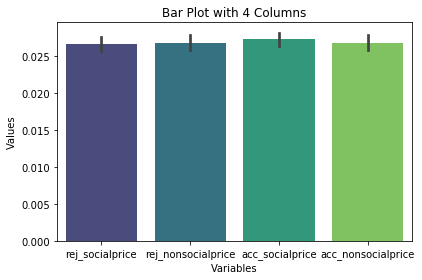

In [85]:

# Prepare data for plotting
fourbarplot_melted = fourbarplot.melt(var_name='ConditionxType', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fourbarplot_melted, x='ConditionxType', y='Price', palette='viridis')

# Customize the plot
plt.title('Bar Plot with 4 Columns')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
nonsocialspent_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
socialspent_mean = shortformdata['social_decisionprice_mean'].mean()
                                 
print(nonsocialspent_mean)
print(socialspent_mean)



0.0267924724265539
0.026957234587588655


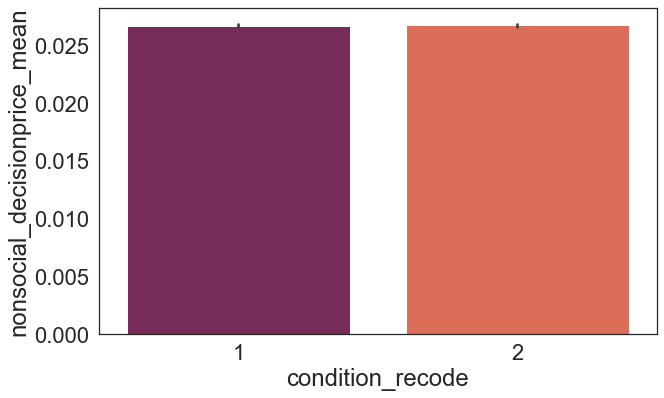

In [115]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_nonsocial = sns.barplot(x='condition_recode', y='nonsocial_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_nonsocial.figure.savefig('totalspent_nonsocial.png',bbox_inches='tight')

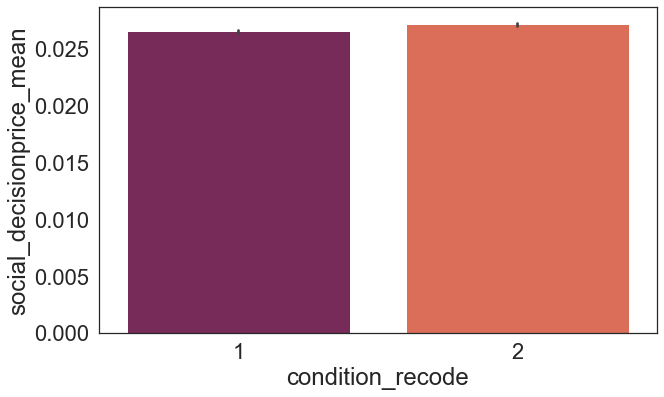

In [116]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='condition_recode', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_social.figure.savefig('totalspent_social.png',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='socialchoice', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent.figure.savefig('totalspent_social.png',bbox_inches='tight')